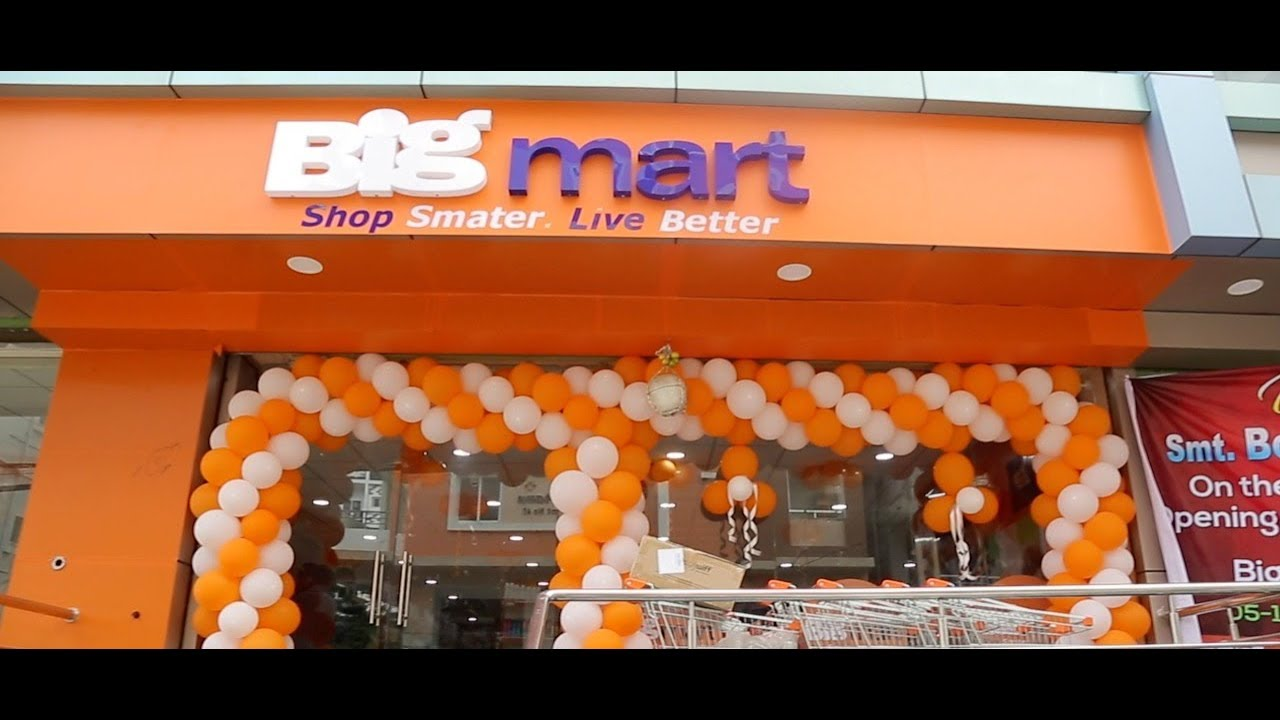

# Business Understanding

# Data Understanding

* ***LOADING DATA***

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [100]:
df = pd.read_csv('https://raw.githubusercontent.com/SravaniThota96/Clustering/main/Bigmart_sales.csv')

In [101]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [102]:
df.shape

(8523, 12)

In [103]:
print("Number of Records:", df.shape[0])
print("Number of Features:", df.shape[1])

Number of Records: 8523
Number of Features: 12


* ***DATA CLEANING***

For better usability, lets convert all column names to lower case. 

In [104]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [105]:
df.columns = df.columns.str.lower()
df.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales'],
      dtype='object')

Let us have a look at the info of the dataset

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   item_weight                7060 non-null   float64
 2   item_fat_content           8523 non-null   object 
 3   item_visibility            8523 non-null   float64
 4   item_type                  8523 non-null   object 
 5   item_mrp                   8523 non-null   float64
 6   outlet_identifier          8523 non-null   object 
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size                6113 non-null   object 
 9   outlet_location_type       8523 non-null   object 
 10  outlet_type                8523 non-null   object 
 11  item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


* It seems that item_weight and outlet_size has null values. Let's impute them.
* Dataset contains categorical data, which needs to be encoded to numerical data.

In [107]:
df.isnull().sum()

item_identifier                 0
item_weight                  1463
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

***Imputation***

In [108]:
df['item_weight'].nunique()

415

In [109]:
df['outlet_size'].nunique()

3

In [110]:
df['outlet_size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [111]:
df['outlet_size'].value_counts()

Medium    2793
Small     2388
High       932
Name: outlet_size, dtype: int64

In [112]:
df.pivot_table(df, columns = ['outlet_size'])

outlet_size,High,Medium,Small
item_mrp,141.425982,140.590514,141.970209
item_outlet_sales,2298.995256,2681.603542,1912.149161
item_visibility,0.059957,0.060142,0.071383
item_weight,13.006148,12.895420,12.848075
outlet_establishment_year,1987.000000,1997.635875,1997.072864


In [113]:
pd.crosstab(df['outlet_size'], df['outlet_type'])

outlet_type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
outlet_size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


From the above table, all the Grocery Stores are small.
So need to fill with small for all missing values correspoding to grocery store.

In [114]:
df[df['outlet_type'] == 'Grocery Store']['outlet_size'].fillna('Small')

3       Small
23      Small
28      Small
29      Small
30      Small
        ...  
8473    Small
8480    Small
8486    Small
8490    Small
8509    Small
Name: outlet_size, Length: 1083, dtype: object

In [115]:
df.isnull().sum()

item_identifier                 0
item_weight                  1463
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

In [116]:
df['outlet_size'].fillna('Small', inplace = True)

In [117]:
df.isnull().sum()

item_identifier                 0
item_weight                  1463
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                     0
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

In [118]:
mean = df['item_weight'].mean()
df['item_weight'].fillna(mean, inplace = True)

In [119]:
df.isnull().sum()

item_identifier              0
item_weight                  0
item_fat_content             0
item_visibility              0
item_type                    0
item_mrp                     0
outlet_identifier            0
outlet_establishment_year    0
outlet_size                  0
outlet_location_type         0
outlet_type                  0
item_outlet_sales            0
dtype: int64

In [120]:
df[df['item_visibility'] == 0.0000]['item_visibility']

3       0.0
4       0.0
5       0.0
10      0.0
32      0.0
       ... 
8480    0.0
8484    0.0
8486    0.0
8494    0.0
8500    0.0
Name: item_visibility, Length: 526, dtype: float64

There are 526 item_visibility as 0. It cannot be zero. So lets impute with mean.

In [121]:
df['item_visibility'].replace(to_replace = 0.00000, value = np.NaN, inplace = True)

In [122]:
df['item_visibility'].isnull().sum()

526

In [123]:
mean = df['item_visibility'].mean()
df['item_visibility'].fillna(mean, inplace = True)

In [124]:
df['item_visibility'].isnull().sum()

0

In [125]:
df['item_fat_content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: item_fat_content, dtype: int64

Here Low Fat, LF, low fat are same. So let's rename all to same name.
Similarly for regular also.

In [126]:
df['item_fat_content'].replace(to_replace = ['Low Fat', 'LF'], value = 'low fat', inplace = True)

In [127]:
df['item_fat_content'].replace(to_replace = ['Regular', 'reg'], value = 'regular', inplace = True)

In [128]:
df['item_fat_content'].value_counts()

low fat    5517
regular    3006
Name: item_fat_content, dtype: int64

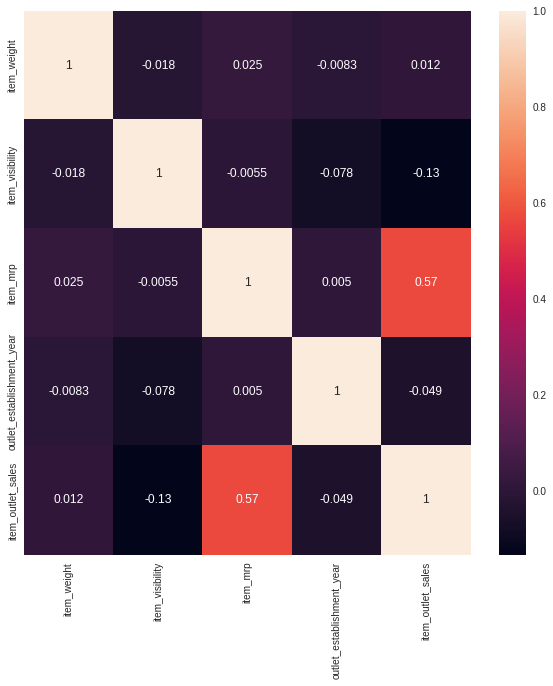

In [129]:
corrmat = df.corr()
plt.figure(figsize=(10,10))  
sns.heatmap(corrmat, annot = True)

# Data Preparation

* ***LabelEncoding***

In [130]:
df.dtypes

item_identifier               object
item_weight                  float64
item_fat_content              object
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_identifier             object
outlet_establishment_year      int64
outlet_size                   object
outlet_location_type          object
outlet_type                   object
item_outlet_sales            float64
dtype: object

In [131]:
df_cat = list(df.dtypes[df.dtypes == 'object'].index)
df_cat

['item_identifier',
 'item_fat_content',
 'item_type',
 'outlet_identifier',
 'outlet_size',
 'outlet_location_type',
 'outlet_type']

In [140]:
df_new = df.copy()

In [141]:
LE=LabelEncoder()
for c in df_cat:
    df_new[c]=df_new[[c]].apply(LE.fit_transform)

In [142]:
df_new.dtypes

item_identifier                int64
item_weight                  float64
item_fat_content               int64
item_visibility              float64
item_type                      int64
item_mrp                     float64
outlet_identifier              int64
outlet_establishment_year      int64
outlet_size                    int64
outlet_location_type           int64
outlet_type                    int64
item_outlet_sales            float64
dtype: object

In [143]:
df_enc = df_new.copy()

In [181]:
df['outlet_location_type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: outlet_location_type, dtype: int64

In [179]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [144]:
df_enc.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.070482,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.070482,9,53.8614,1,1987,0,2,1,994.7052


In [145]:
df_enc = df_enc.drop('outlet_establishment_year', axis = 1)

In [146]:
df_enc.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,156,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700
3,1121,19.20,1,0.070482,6,182.0950,0,2,2,0,732.3800
4,1297,8.93,0,0.070482,9,53.8614,1,0,2,1,994.7052


Let's scale all features to same range

* ***Standardise***

In [40]:
scaler = StandardScaler()
scaler.fit(df_enc)
df_scale = pd.DataFrame(scaler.transform(df_enc), columns = df_enc.columns)

In [151]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(df_enc)

In [152]:
X[0]

array([0.10012837, 0.28252456, 0.        , 0.03839895, 0.26666667,
       0.92750715, 1.        , 0.5       , 0.        , 0.33333333,
       0.28358666])

In [153]:
from sklearn.decomposition import PCA

In [154]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

In [155]:
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])

In [156]:
kmeans=KMeans(n_clusters=5, random_state=0).fit(X)

In [157]:
labels = kmeans.labels_
X_pca_df['Labels'] = labels

In [158]:
X_pca_df.head()

,X1,X2,X3,Labels
0,-0.532548,-0.279902,-0.531606,0
1,0.569478,0.642760,-0.052653,3
2,-0.532299,-0.372179,-0.472428,0
3,0.337773,0.618790,0.740291,3
4,0.815391,-0.388896,0.027465,1


In [159]:
X_pca_df['Labels'] = X_pca_df['Labels'].astype(str)

In [160]:
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Labels'])
fig.show()

In [184]:
df_enc.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,156,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700
3,1121,19.20,1,0.070482,6,182.0950,0,2,2,0,732.3800
4,1297,8.93,0,0.070482,9,53.8614,1,0,2,1,994.7052


In [185]:
results_df = df_enc.drop(['item_identifier', 'outlet_identifier'], axis=1)
results_df['Labels'] = kmeans.labels_
results_df = results_df.astype({'item_weight':'float64', 'item_type':'int32', 'item_visibility':'float64', 'outlet_size':'int32', 'outlet_location_type':'int32'})
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_weight           8523 non-null   float64
 1   item_fat_content      8523 non-null   int64  
 2   item_visibility       8523 non-null   float64
 3   item_type             8523 non-null   int32  
 4   item_mrp              8523 non-null   float64
 5   outlet_size           8523 non-null   int32  
 6   outlet_location_type  8523 non-null   int32  
 7   outlet_type           8523 non-null   int64  
 8   item_outlet_sales     8523 non-null   float64
 9   Labels                8523 non-null   int32  
dtypes: float64(4), int32(4), int64(2)
memory usage: 532.8 KB


In [186]:
summary = {}

for index in range(6):
    summary[index] = results_df[results_df['Labels'] == index].describe().T  # .describe method provides general statistics about the data

In [187]:
summary[0]

,count,mean,std,min,25%,50%,75%,max
item_weight,1540.0,12.980747,4.120242,4.590000,9.800000,12.857645,16.10000,21.350000
item_fat_content,1540.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
item_visibility,1540.0,0.073588,0.054813,0.003598,0.032784,0.061012,0.09883,0.328391
item_type,1540.0,7.599351,4.013768,0.000000,5.000000,8.000000,10.00000,15.000000
item_mrp,1540.0,139.641502,61.733040,32.455800,93.561350,141.881200,182.76340,266.588400
outlet_size,1540.0,1.612987,0.487225,1.000000,1.000000,2.000000,2.00000,2.000000
outlet_location_type,1540.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
outlet_type,1540.0,0.775325,0.417504,0.000000,1.000000,1.000000,1.00000,1.000000
item_outlet_sales,1540.0,1836.848815,1547.681169,34.621600,585.238200,1458.102000,2703.98025,9779.936200
Labels,1540.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


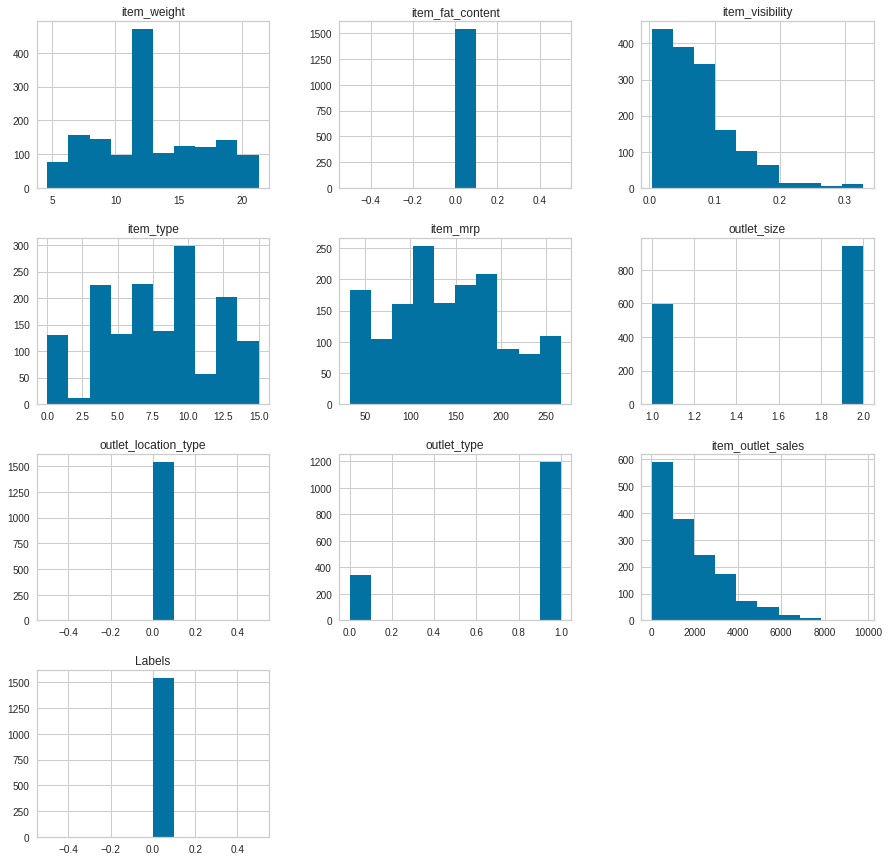

In [188]:
results_df[results_df['Labels'] == 0].hist(figsize=(15,15));

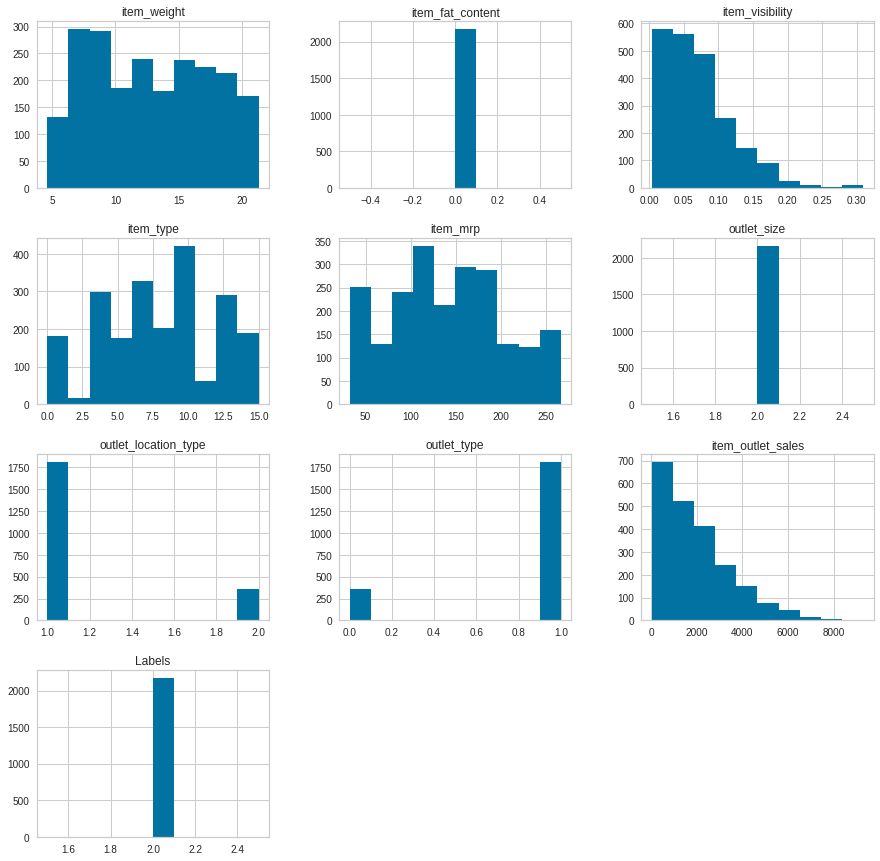

In [189]:
results_df[results_df['Labels'] == 2].hist(figsize=(15,15));

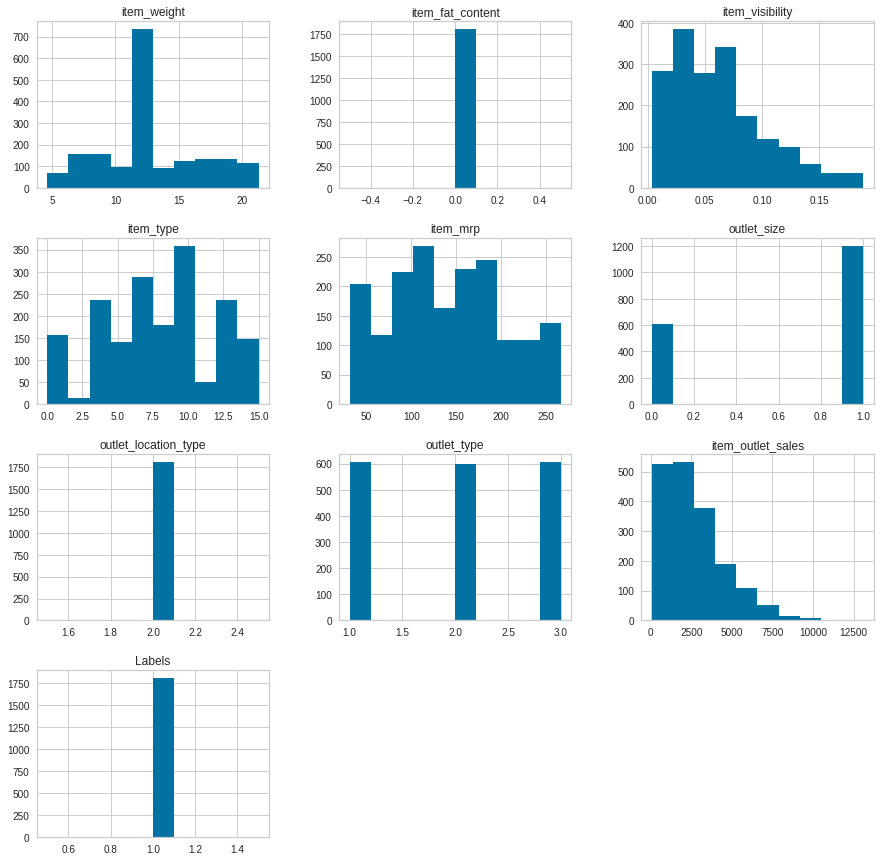

In [190]:
results_df[results_df['Labels'] == 1].hist(figsize=(15,15));

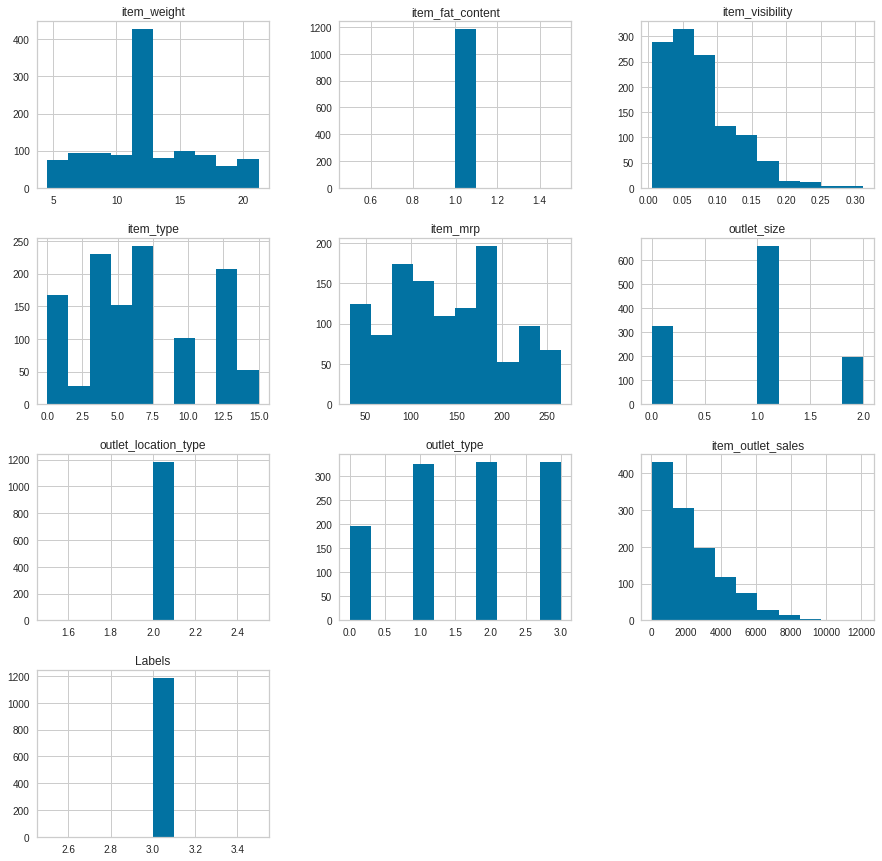

In [191]:
results_df[results_df['Labels'] == 3].hist(figsize=(15,15));

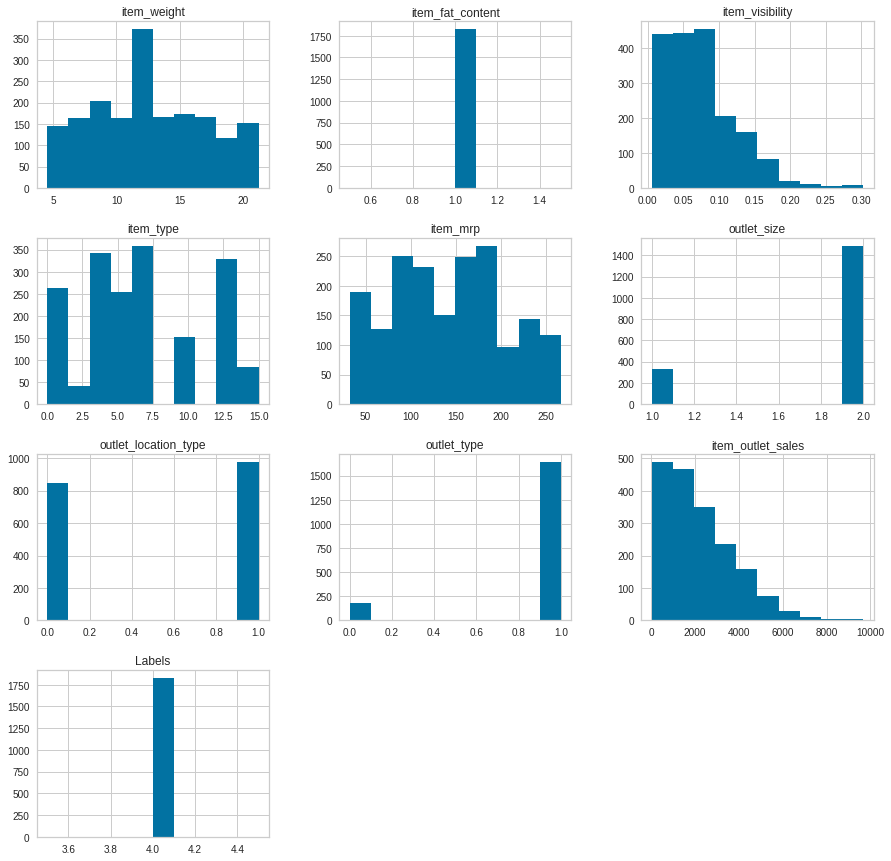

In [192]:
results_df[results_df['Labels'] == 4].hist(figsize=(15,15));

In [41]:
df_scale.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,-1.388514,-0.841872,-0.738147,-1.117123e+00,-0.766479,1.747454,1.507813,-0.664080,-1.369334,-0.252658,0.910601
1,-1.717991,-1.641706,1.354743,-1.050818e+00,1.608963,-1.489023,-0.607071,-0.664080,1.091569,1.002972,-1.018440
2,-0.262057,1.098554,-0.738147,-1.102496e+00,0.658786,0.010040,1.507813,-0.664080,-1.369334,-0.252658,-0.049238
3,0.759769,1.500838,1.354743,2.848045e-16,-0.291391,0.660050,-1.664513,0.799954,1.091569,-1.508289,-0.849103
4,1.151580,-0.929428,-0.738147,2.848045e-16,0.421242,-1.399220,-1.312032,-2.128115,1.091569,-0.252658,-0.695373


* ***Elbow Method***

In [42]:
df.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales'],
      dtype='object')

In [43]:
df_feat = df_scale[['item_weight', 'item_visibility', 'outlet_type', 'item_mrp', 'item_outlet_sales']]
df_feat.head()

,item_weight,item_visibility,outlet_type,item_mrp,item_outlet_sales
0,-0.841872,-1.117123e+00,-0.252658,1.747454,0.910601
1,-1.641706,-1.050818e+00,1.002972,-1.489023,-1.018440
2,1.098554,-1.102496e+00,-0.252658,0.010040,-0.049238
3,1.500838,2.848045e-16,-1.508289,0.660050,-0.849103
4,-0.929428,2.848045e-16,-0.252658,-1.399220,-0.695373


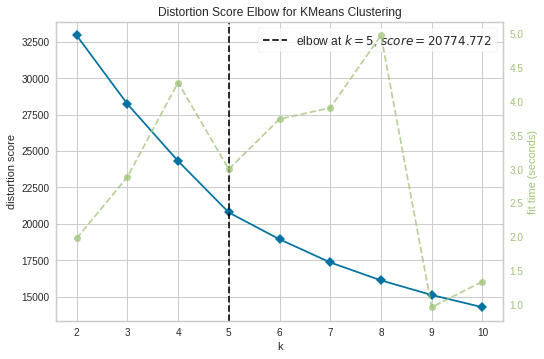

In [44]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_feat)
Elbow_M.show()

We need to form 5 clusters.

In [45]:
kmeans=KMeans(n_clusters=6, random_state=0).fit(df_feat)

In [46]:
labels = kmeans.labels_
df_feat['Labels'] = labels

<ipython-input-46-05a2ece04af7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feat['Labels'] = labels


In [47]:
df_feat.head()

,item_weight,item_visibility,outlet_type,item_mrp,item_outlet_sales,Labels
0,-0.841872,-1.117123e+00,-0.252658,1.747454,0.910601,0
1,-1.641706,-1.050818e+00,1.002972,-1.489023,-1.018440,2
2,1.098554,-1.102496e+00,-0.252658,0.010040,-0.049238,4
3,1.500838,2.848045e-16,-1.508289,0.660050,-0.849103,4
4,-0.929428,2.848045e-16,-0.252658,-1.399220,-0.695373,2


In [49]:
df_feat.tail()

,item_weight,item_visibility,outlet_type,item_mrp,item_outlet_sales,Labels
8518,-1.418084,-0.281124,-0.252658,1.180783,0.349915,0
8519,-1.059578,-0.482263,-0.252658,-0.527301,-0.956402,2
8520,-0.534243,-0.724347,-0.252658,-0.897208,-0.579100,2
8521,-1.336444,1.533814,1.002972,-0.607977,-0.196725,2
8522,0.459634,-0.525445,-0.252658,-1.052261,-0.829594,4


In [51]:
import plotly.express as px

fig = px.scatter_3d(df_feat, x='item_visibility', y='outlet_type', z='item_outlet_sales',
              color=df_feat['Labels'])
fig.show()

In [98]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.070482,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.070482,9,53.8614,1,1987,0,2,1,994.7052


In [48]:
results_df = df.drop(['item_identifier', 'outlet_identifier', 'outlet_establishment_year'], axis=1)
results_df['Labels'] = kmeans.labels_
results_df = results_df.astype({'Sex':'int32', 'Marital status':'int32', 'Education':'int32', 'Occupation':'int32', 'Settlement size':'int32'})
results_df.info()